# Segmentación de Especies con Cluster Analysis

El conjunto de datos de la flor **Iris** es uno de los más populares para el Aprendizaje de Máquina (ML).  Si no lo conocen, pueden leer sobre él en:

https://en.wikipedia.org/wiki/Iris_flower_data_set

El conjunto de datos *iris.csv* tiene cuatro variables:  

* **sepal length** (longitud del sépalo), 
* **sepal width** (ancho del sépalo), 
* **petal length** (longitud del pétalo), 
* **petal width** (ancho del pétalo).

**SECCIÓN 1:**

1. Visualicen los datos para ver si pueden detectar algunos grupos. **Ayuda:**   utilicen la forma del sépalo:

2. Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.  

3. Estandaricen los datos e intenten el paso 2, de nuevo.  ¿Qué diferencias hay, si es que lo hay?

4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)

5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

6. Comparen sus soluciones con los datos reales, archivo: *iris-con-respuestas.csv*

**Obviamente solo hay tres especies, porque ese es el archivo de datos reales!**

¿Funcionó el clustering con la forma del sépalo?

**Sección 2:**

Repitan el proceso pero ahora utilizando la forma del pétalo.  Respondan a las mismas preguntas


**Sección 3:**

Utilicen la librería "kneed" y vean si el resultado coincide con el método del "codo" que hicieron manualmente.  ¿A que podría deberse la diferencia, si la hay?  ¿Les dió el número correcto de clusters, comparado a los datos reales?  

Basado en los resultado que tuvieron, ¿A qué conclusiones llegaron?


**Sección 1**

In [249]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
# Utilizar los estilos de Seaborn
sns.set()
# Importar el módulo KMeans para usar k-means clustering con sklearn
from sklearn.cluster import KMeans

In [250]:
datos = pd.read_csv('iris.csv')

In [251]:
# Darle un vistazo a los datos
datos.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<function matplotlib.pyplot.show(close=None, block=None)>

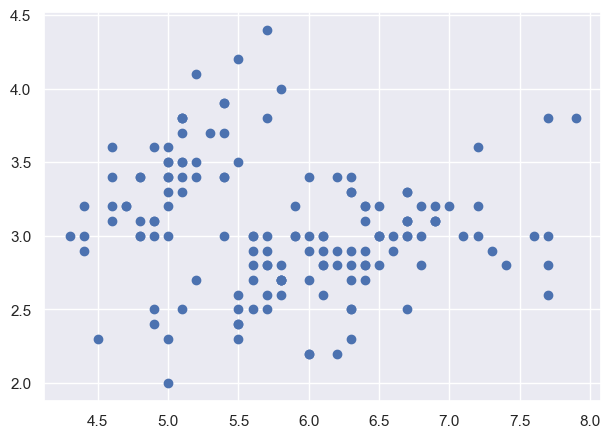

In [252]:
# Utilizar el código más simple posible para crear una gráfica de dispersión usando longitud y latitud
# Nótese que para obtener un resultado que se asemeje al mapa mundi, debemos usar la longitud como y, y la latitud como x

plt.scatter(datos['sepal_length'],datos['sepal_width'])

# Fijar límites a los ejes, a semejanza del mapa mundi

plt.show

In [253]:
x = datos.filter(["sepal_length", "sepal_width"])
x

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [254]:
# Crear un objeto (que llamaremos kmeans)
# El número en los paréntesis es K, el número de grupos que deseamos

kmeans = KMeans(2)
kmeans.fit(x)
# Crear una variable que contenga los clusters que se han predicho para cada observación

clusters_identificados = kmeans.fit_predict(x)

# Revisar los resultados

clusters_identificados

c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [255]:
# Crear una copia de los datos

datos_con_clusters = datos.copy()

# Crear una nueva serie, que tenga el cluster identificado para cada observación

datos_con_clusters['Cluster'] = clusters_identificados

# Revisar el resultado

datos_con_clusters

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


In [256]:
datos_con_clusters["Cluster"] = datos_con_clusters["Cluster"].astype("category")

fig = px.scatter(datos_con_clusters, 
                 x = "sepal_length", 
                 y = "sepal_width", 
                 color = "Cluster",
#                 size = '', 
                )
fig.show()

In [257]:
from sklearn.preprocessing import StandardScaler
normalizador = StandardScaler()
x = normalizador.fit_transform(x)
kmeans.fit(x)
clusters_identificados = kmeans.fit_predict(x)
datos_con_clusters = datos.copy()
datos_con_clusters['sepal_length'] = x.T[0]
datos_con_clusters['sepal_width'] = x.T[1]
datos_con_clusters['Cluster'] = clusters_identificados
datos_con_clusters["Cluster"] = datos_con_clusters["Cluster"].astype("category")

fig = px.scatter(datos_con_clusters, 
                 x = "sepal_length", 
                 y = "sepal_width", 
                 color = "Cluster",
#                 size = '', 
                )
fig.show()

c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [258]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)


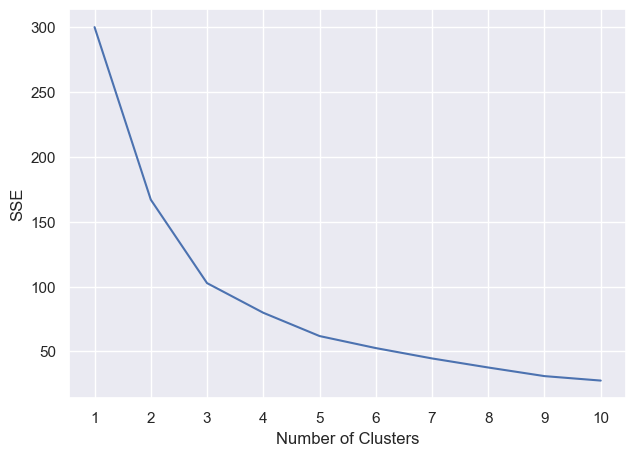

In [259]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [260]:
kmeans = KMeans(3)
kmeans.fit(x)
clusters_identificados = kmeans.fit_predict(x)
datos_con_clusters = datos.copy()
datos_con_clusters['sepal_length'] = x.T[0]
datos_con_clusters['sepal_width'] = x.T[1]
datos_con_clusters['Cluster'] = clusters_identificados
datos_con_clusters["Cluster"] = datos_con_clusters["Cluster"].astype("category")
fig = px.scatter(datos_con_clusters, 
                 x = "sepal_length", 
                 y = "sepal_width", 
                 color = "Cluster",
#                 size = '', 
                )
fig.show()

c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [261]:
kmeans = KMeans(4)
kmeans.fit(x)
clusters_identificados = kmeans.fit_predict(x)
datos_con_clusters = datos.copy()
datos_con_clusters['sepal_length'] = x.T[0]
datos_con_clusters['sepal_width'] = x.T[1]
datos_con_clusters['Cluster'] = clusters_identificados
datos_con_clusters["Cluster"] = datos_con_clusters["Cluster"].astype("category")

fig = px.scatter(datos_con_clusters, 
                 x = "sepal_length", 
                 y = "sepal_width", 
                 color = "Cluster",
#                 size = '', 
                )
fig.show()

c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Funciona paa el sépalo y los separa a la mayoría como se debe. Sin embargo, varios de estos no se pueden apreciar debido a que se muestran algunos datos muy juntos y similares que causan ciera confusiín respectiva.

**Sección 2**

In [262]:
x = datos.filter(["petal_length", "petal_width"])
normalizador = StandardScaler()
x = normalizador.fit_transform(x)

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)


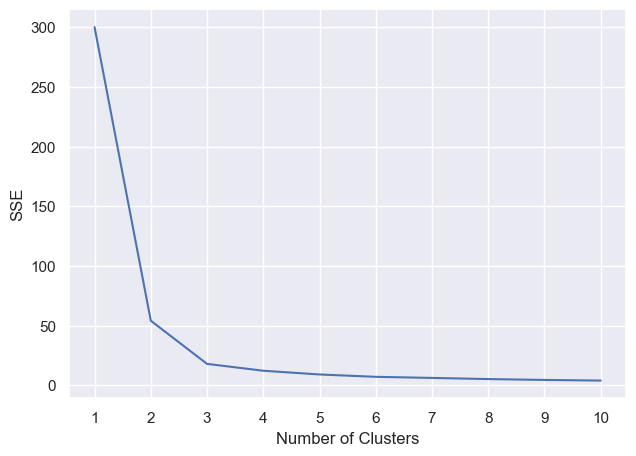

In [263]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [264]:
kmeans = KMeans(2)
kmeans.fit(x)
clusters_identificados = kmeans.fit_predict(x)
datos_con_clusters = datos.copy()
datos_con_clusters['petal_length'] = x.T[0]
datos_con_clusters['petal_width'] = x.T[1]
datos_con_clusters['Cluster'] = clusters_identificados
datos_con_clusters["Cluster"] = datos_con_clusters["Cluster"].astype("category")
fig = px.scatter(datos_con_clusters, 
                 x = "petal_length", 
                 y = "petal_width", 
                 color = "Cluster",
#                 size = '', 
                )
fig.show()

c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [265]:
kmeans = KMeans(3)
kmeans.fit(x)
clusters_identificados = kmeans.fit_predict(x)
datos_con_clusters = datos.copy()
datos_con_clusters['petal_length'] = x.T[0]
datos_con_clusters['petal_width'] = x.T[1]
datos_con_clusters['Cluster'] = clusters_identificados
datos_con_clusters["Cluster"] = datos_con_clusters["Cluster"].astype("category")
fig = px.scatter(datos_con_clusters, 
                 x = "petal_length", 
                 y = "petal_width", 
                 color = "Cluster",
#                 size = '', 
                )
fig.show()

c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [266]:
kmeans = KMeans(4)
kmeans.fit(x)
clusters_identificados = kmeans.fit_predict(x)
datos_con_clusters = datos.copy()
datos_con_clusters['petal_length'] = x.T[0]
datos_con_clusters['petal_width'] = x.T[1]
datos_con_clusters['Cluster'] = clusters_identificados
datos_con_clusters["Cluster"] = datos_con_clusters["Cluster"].astype("category")
fig = px.scatter(datos_con_clusters, 
                 x = "petal_length", 
                 y = "petal_width", 
                 color = "Cluster",
#                 size = '', 
                )
fig.show()

c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Para el cluster utilizando el ptalo, se ve mucho mejor la diferencia entre los clusters, y se identifica mejor los diferentes clusters, y mucho mejor la separación de las diferentes especies de igual manera. 